# DATA PREPARATION

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import numpy as np # for arrays 
import pandas as pd # for data analysis and deep learning
     
import warnings # for warnings
warnings.simplefilter('ignore')

import os #provides functions for interacting with the OS
import PIL #provide support for image operations
import glob #to return all file paths that match a specific pattern
import pathlib #for files and directories

import random # random operations
import matplotlib.pyplot as plt # graphical visualization operations
import seaborn as sns # statistical visualization operations

import tensorflow as tf #training the model
from tensorflow import keras #high level NN library
from tensorflow.keras import layers
from tensorflow.keras import optimizers #Optimizers (Adam, Adadelta, SGD)
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img #displaying images from dataset
from keras.models import Sequential #Building the architecture
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense #Building the architecture
from keras.layers import Dropout #dropout - a technique to prevent model from overfitting
from keras.callbacks import EarlyStopping #for epochs. Less time consuming

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
#PERSONAL LAPTOP
path_Training = pathlib.Path('C:/Users/User/Documents/MASTER APU/3RD SEM/DL/ASSIGNMENT/fruits-360/Training')
path_Test = pathlib.Path('C:/Users/User/Documents/MASTER APU/3RD SEM/DL/ASSIGNMENT/fruits-360/Test')

In [ ]:
#GOOGLE COLLAB
path_Training = pathlib.Path('/content/drive/My Drive/Colab Notebooks/fruits-360/Training')
path_Test = pathlib.Path('/content/drive/My Drive/Colab Notebooks/fruits-360/Test')

In [ ]:
x = len(list(path_Training.glob("*/*.jpg")))
print("There are", x , "images in the training set")

y = len(list(path_Test.glob("*/*.jpg")))
print("There are", y , "images in the test set")

There are 67692 images in the training set
There are 22688 images in the test set


In [ ]:
#List all the name of the classes
labels=pd.Series(os.listdir(path_Test))

labels=labels.sort_values()
len(labels)

131

In [ ]:
labels=labels.to_list()
labels

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [ ]:
#Create a function to obtain the number of images in a specific class
def get_amount(data_dir):
    data=[]
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        count=0
        for img in os.listdir(path):
            count+=1

        data.append([label,count])
        
    return np.array(data)

In [ ]:
fruit_amounts=get_amount(path_Training)

In [ ]:
df=pd.DataFrame(fruit_amounts,columns=["Names","Amounts"])

In [ ]:
df_sorted=df.sort_values(by="Amounts",ascending=True) #10 fruit in asc order number of amount
df_sorted.head(10)

,Names,Amounts
42,Ginger Root,297
87,Pear Kaiser,300
66,Mangostan,300
126,Tomato Maroon,367
37,Cucumber Ripe,392
103,Plum 2,420
65,Mango Red,426
14,Avocado,427
9,Apple Red 3,429
76,Onion White,438


In [ ]:
df_sorted.dtypes

Names      object
Amounts    object
dtype: object

In [ ]:
df_sorted.Amounts=df_sorted.Amounts.astype(float)
df_sorted.dtypes

Names       object
Amounts    float64
dtype: object

In [ ]:
df_sorted=df_sorted.reset_index(drop=True)
df_sorted.head(10) #first 10 fruit in ascending order number of amount

,Names,Amounts
0,Ginger Root,297.0
1,Pear Kaiser,300.0
2,Mangostan,300.0
3,Tomato Maroon,367.0
4,Cucumber Ripe,392.0
5,Plum 2,420.0
6,Mango Red,426.0
7,Avocado,427.0
8,Apple Red 3,429.0
9,Onion White,438.0


# DATA VISUALIZATION

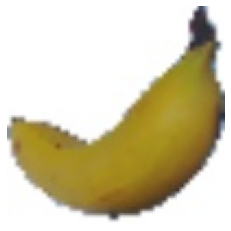

In [ ]:
img = load_img('C:/Users/User/Documents/MASTER APU/3RD SEM/DL/ASSIGNMENT/fruits-360/Training/Banana/0_100.jpg')
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(img)

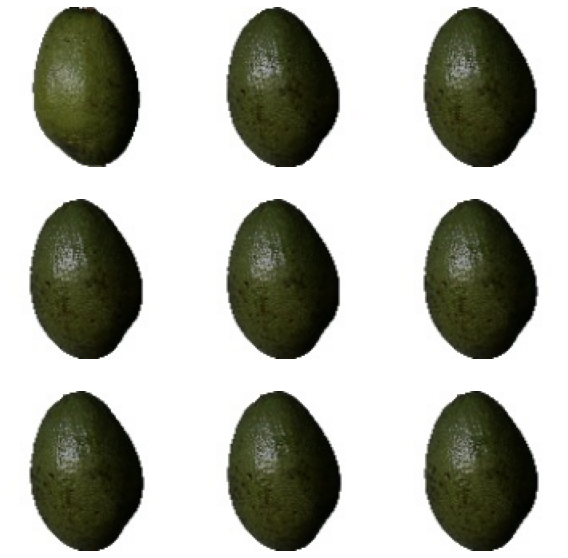

In [ ]:
fruits = list(path_Training.glob('Avocado/*.jpg')) #try for another fruit as well for another visual

plt.figure(figsize=(10, 10))

for i in range(9): #9 image
    plt.subplot(3, 3, i + 1) #3x3 grid starting from 1 instead of 0
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img) #to display the image
    plt.axis('off')

plt.show()

In [ ]:
#Create a function to obtain the data (images) with their label (class)
img_size = 100

def get_data(data_dir): 
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            an_image = PIL.Image.open(os.path.join(path, img))
            image_array=np.asarray(an_image)
            data.append([image_array, class_num])
    return np.array(data)

In [ ]:
train_data=get_data(path_Training)

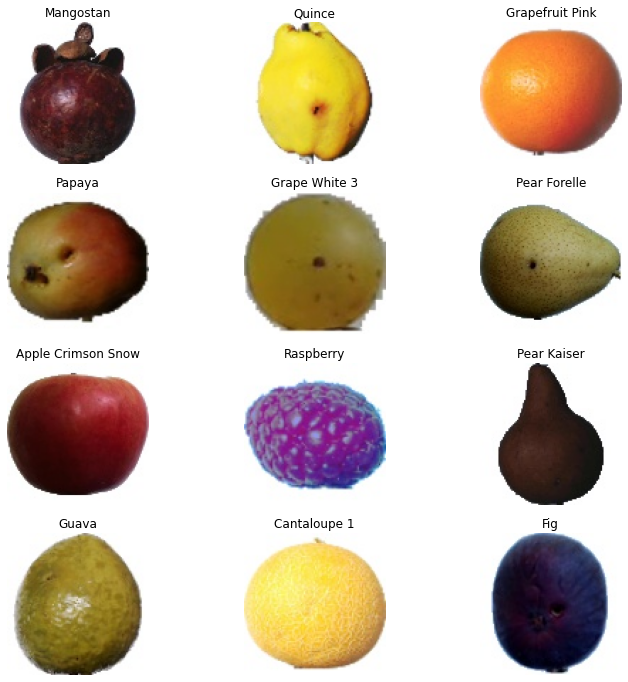

In [ ]:
x = random.sample(range(0, len(train_data)), 12) #pick 12 random fruit

plt.subplots(4,3,figsize=(12,12)) #in a 4x3 grid

for i in range(1,13):
    plt.subplot(4,3,i)
    plt.imshow(train_data[x[i-1]][0])
    plt.title(labels[train_data[x[i-1]][1]])
    plt.axis('off')

# DATA PREPROCESSING

In [ ]:
#Data augmentation
#Data Generation - Train-Test

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        path_Training,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        path_Test,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
train_generator.classes

array([  0,   0,   0, ..., 130, 130, 130])

In [ ]:
test_generator.classes

array([  0,   0,   0, ..., 130, 130, 130])

In [ ]:
#Size of all the images
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 100, 100, 3)
labels batch shape: (32, 131)


# BUILDING THE ARCHITECTURE

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Initializing Neural Network
model1 = Sequential()

#3,3 is kernel size. 32 is the number of filter
model1.add(Conv2D(32,(3,3),input_shape = (100, 100, 3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D())

#Hidden
model1.add(Conv2D(64,(3,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D())

model1.add(Flatten())

model1.add(Dense(512))
model1.add(Activation("relu"))

model1.add(Dense(256))
model1.add(Activation("relu"))

model1.add(Dropout(0.5)) # helps prevent overfitting

#Output
model1.add(Dense(len(labels))) 
model1.add(Activation("softmax"))

In [ ]:
#Arc2
#Initializing Neural Network
model2 = Sequential()

model2.add(Conv2D(32,(3,3),input_shape = (100, 100, 3))) 
model2.add(Activation("tanh"))
model2.add(MaxPooling2D())

model2.add(Conv2D(64,(3,3)))
model2.add(Activation("tanh"))
model2.add(MaxPooling2D())

model2.add(Flatten())

model2.add(Dense(512))
model2.add(Activation("tanh"))

model2.add(Dense(256))
model2.add(Activation("tanh"))

#Output
model2.add(Dense(len(labels))) 
model2.add(Activation("sigmoid"))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

In [ ]:
keras.utils.plot_model(model1, "ANN_Regularizer.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
keras.utils.plot_model(model2, "ANN.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
model1.compile(loss = "categorical_crossentropy",
              optimizer=optimizers.Adam(lr = 0.001),
              metrics = ["accuracy"])

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=10, verbose=2)

In [ ]:
#Arc1
history1=model1.fit(train_generator,
                  steps_per_epoch=50,
                  epochs=100,
                  validation_data=test_generator,
                  validation_steps=25,
                  callbacks=callback)

In [ ]:
model2.compile(loss = "categorical_crossentropy",
              optimizer=optimizers.Adam(lr = 0.001),
              metrics = ["accuracy"])

In [ ]:
history2=model2.fit(train_generator,
                  steps_per_epoch=50,
                  epochs=100,
                  validation_data=test_generator,
                  validation_steps=25)

In [ ]:
#Arc1
model_score1=history1.model.evaluate(test_generator)
model_score1
print(f"Model Accuracy (Test Set): %{model_score1[1]*100}")

709/709 [==============================] - 45s 63ms/step - loss: 0.1707 - accuracy: 0.9535
Model Accuracy (Test Set): %95.35437226295471


In [ ]:
#Arc2
model_score2=history2.model.evaluate(test_generator)
#Arc2
model_score2
print(f"Model Accuracy (Test Set): %{model_score2[1]*100}")

709/709 [==============================] - 37s 52ms/step - loss: 2.3780 - accuracy: 0.6190
Model Accuracy (Test Set): %61.89615726470947


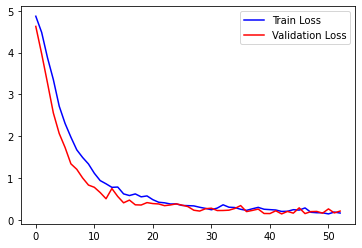

In [ ]:
#Arc1
plt.plot(history1.history["loss"],color="blue",label="Train Loss")
plt.plot(history1.history["val_loss"],color="red",label="Validation Loss")

plt.legend()
plt.show()

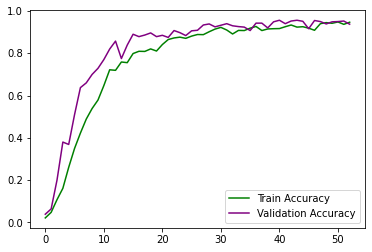

In [ ]:
#Arc1
plt.plot(history1.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(history1.history["val_accuracy"],color="purple",label="Validation Accuracy")

plt.legend()
plt.show()

In [ ]:
#Arc1
val_loss1 = history1.history['val_loss']
np.argmin(val_loss1) #minimum values along an axis

42

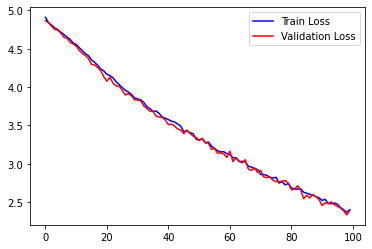

In [ ]:
#Arc2
plt.plot(history2.history["loss"],color="blue",label="Train Loss")
plt.plot(history2.history["val_loss"],color="red",label="Validation Loss")

plt.legend()
plt.show()

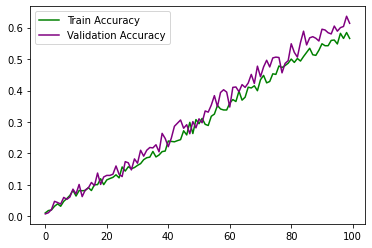

In [ ]:
#Arc2
plt.plot(history2.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(history2.history["val_accuracy"],color="purple",label="Validation Accuracy")

plt.legend()
plt.show()

In [ ]:
#Arc2
val_loss2 = history2.history['val_loss']
np.argmin(val_loss2) #minimum values along an axis

99

In [ ]:
model.save('C:/Users/User/Documents/MASTER APU/3RD SEM/DL/ASSIGNMENT/TP064415_DL_ANN.h5')